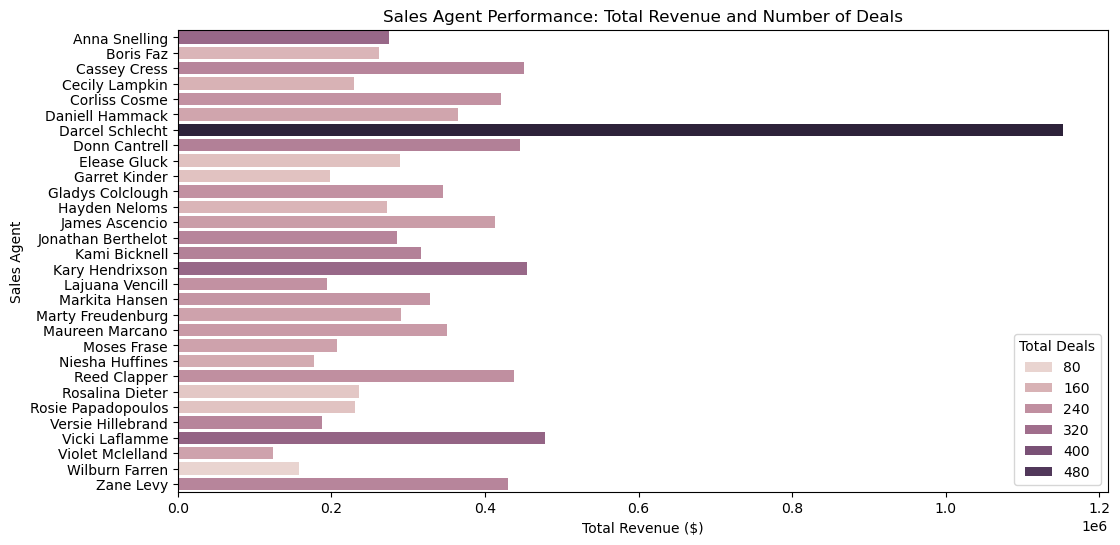

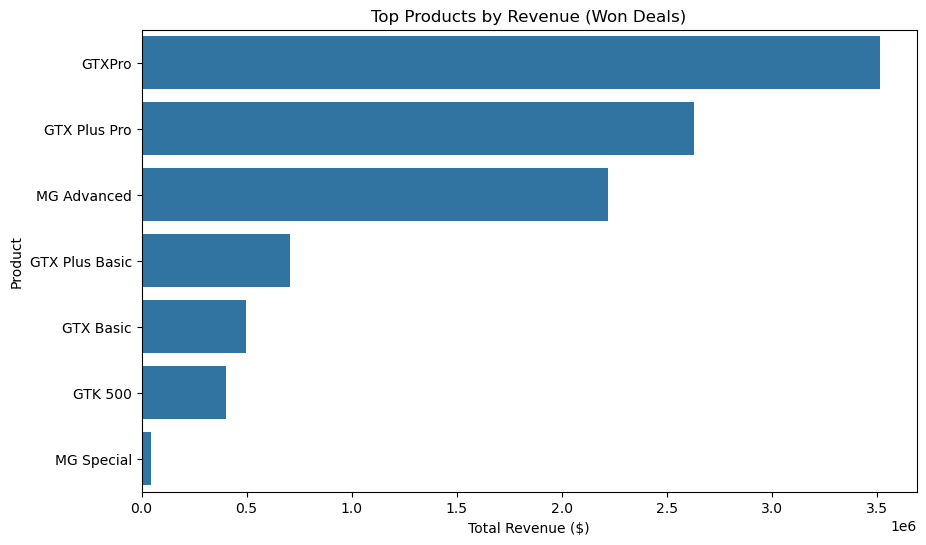

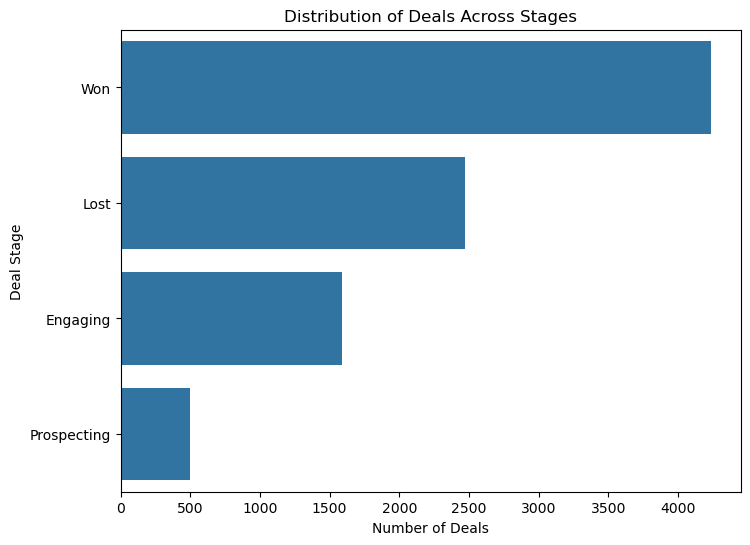

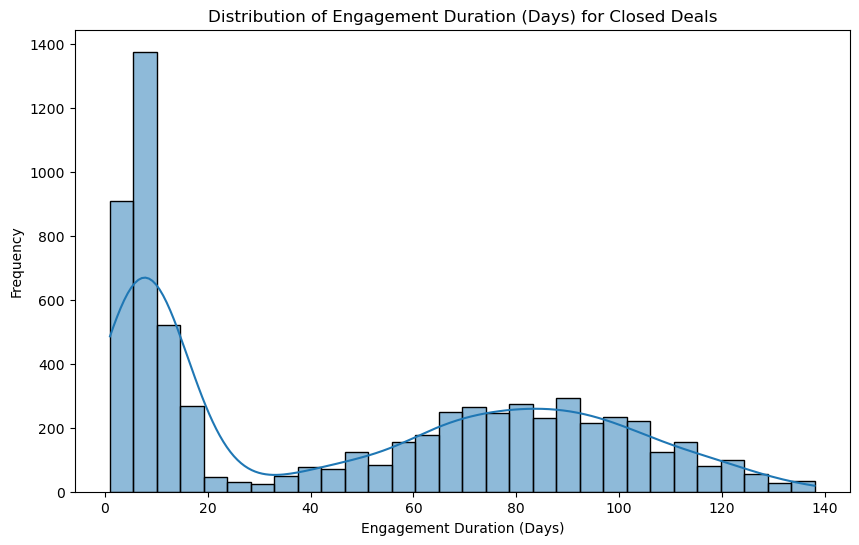

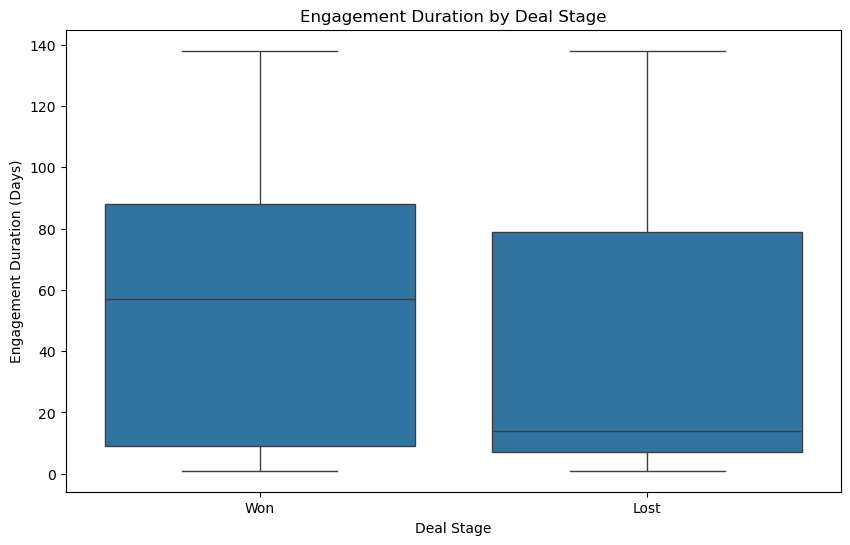

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\sales_pipeline.csv")

# Objective 1: Track Sales Performance - Analyze sales agents' performance on closed deals and revenue
# Filter for closed deals (Won or Lost) and calculate total revenue per sales agent
closed_deals = data[data['deal_stage'].isin(['Won', 'Lost'])]
agent_performance = closed_deals.groupby('sales_agent').agg({
    'close_value': 'sum',
    'opportunity_id': 'count'
}).rename(columns={'close_value': 'Total Revenue', 'opportunity_id': 'Total Deals'})

# Plot sales agent performance (fixed: removed 'size' parameter)
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Revenue', y=agent_performance.index, hue='Total Deals', data=agent_performance.reset_index())
plt.title("Sales Agent Performance: Total Revenue and Number of Deals")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Sales Agent")
plt.show()

# Objective 2: Identify Top Products - Determine which products generate the most revenue
product_revenue = data[data['deal_stage'] == 'Won'].groupby('product')['close_value'].sum().sort_values(ascending=False)

# Plot top products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.values, y=product_revenue.index)
plt.title("Top Products by Revenue (Won Deals)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product")
plt.show()

# Objective 3: Monitor Deal Stages - Track how deals progress through stages
deal_stage_counts = data['deal_stage'].value_counts()

# Plot deal stages
plt.figure(figsize=(8, 6))
sns.barplot(x=deal_stage_counts.values, y=deal_stage_counts.index)
plt.title("Distribution of Deals Across Stages")
plt.xlabel("Number of Deals")
plt.ylabel("Deal Stage")
plt.show()

# Objective 4: Analyze Customer Engagement - Study engage dates and close dates
# Convert date columns to datetime
data['engage_date'] = pd.to_datetime(data['engage_date'])
data['close_date'] = pd.to_datetime(data['close_date'])

# Calculate engagement duration for closed deals (in days)
data['engagement_duration'] = (data['close_date'] - data['engage_date']).dt.days
engagement_analysis = data[data['deal_stage'].isin(['Won', 'Lost'])]

# Plot engagement duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(engagement_analysis['engagement_duration'], bins=30, kde=True)
plt.title("Distribution of Engagement Duration (Days) for Closed Deals")
plt.xlabel("Engagement Duration (Days)")
plt.ylabel("Frequency")
plt.show()

# Additional: Engagement duration by deal stage
plt.figure(figsize=(10, 6))
sns.boxplot(x='deal_stage', y='engagement_duration', data=engagement_analysis)
plt.title("Engagement Duration by Deal Stage")
plt.xlabel("Deal Stage")
plt.ylabel("Engagement Duration (Days)")
plt.show()